project description:<br>
calculate clip score, FID, Aesthetic Predictor score.<br>
Github: https://github.com/Allen33669/control_net_dit

upload /content/infer_prompt_guided_predict_target.pth

set environment

In [ ]:
!pip install matplotlib
!pip install torchmetrics
!pip install seaborn
!pip install numpy
!pip install torchmetrics[image]
!pip install simple-aesthetics-predictor

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from PIL import Image
from transformers import CLIPProcessor
from aesthetics_predictor import AestheticsPredictorV1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 14.0 MB/s eta 0:00:00


load evaluation dataset

<ipython-input-2-012dcd7c600a>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('infer_prompt_guided_predict_target.pth')
<ipython-input-2-012dcd7c600a>:16

____________________________________________________________
texts:15
pale golden rod circle with old lace background
pale golden rod circle with old lace background
light coral circle with white background
cornflower blue circle with light golden rod yellow background
images_guided:15, (512, 512, 3)


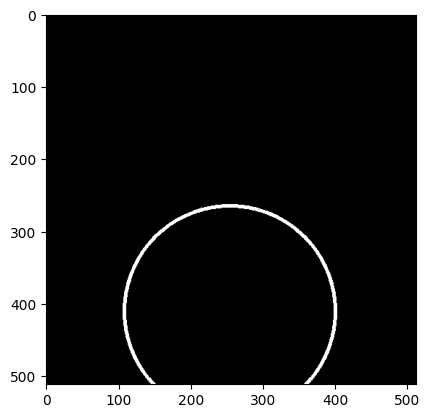

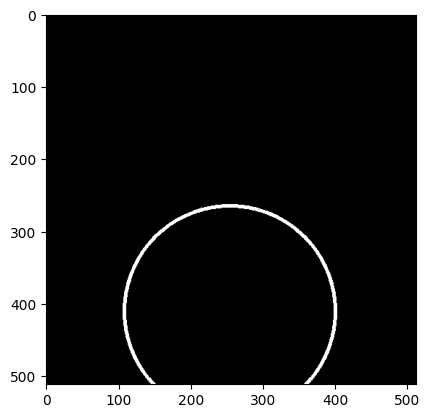

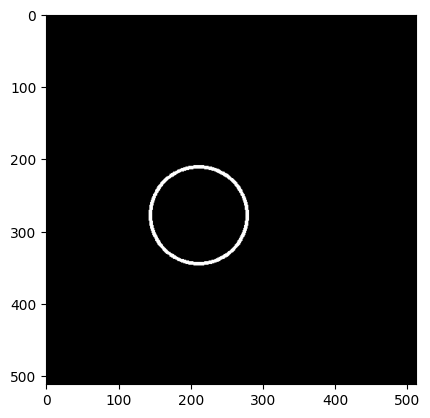

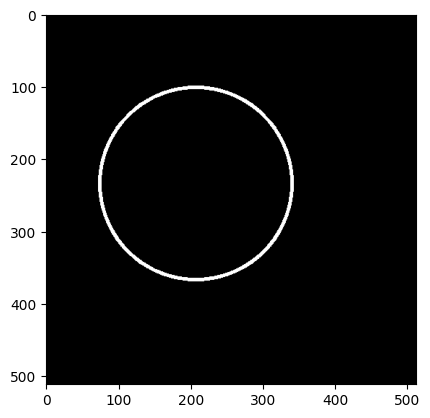

images_predict:15, (512, 512, 3)


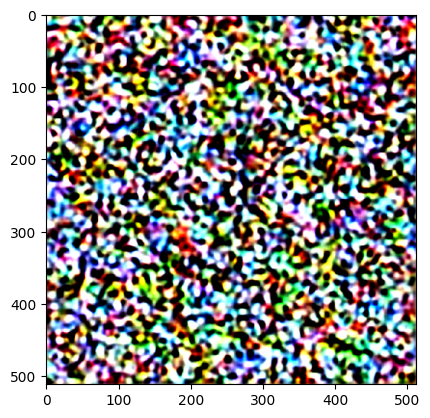

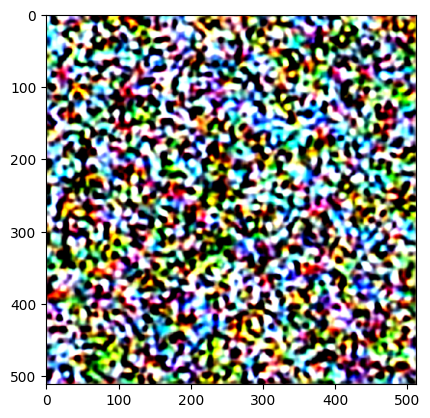

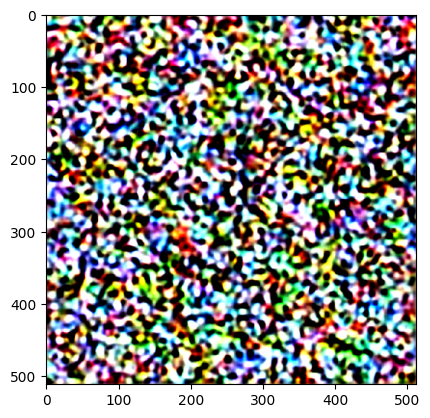

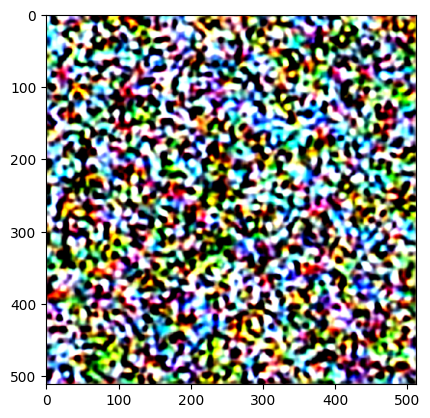

images_target:15, (512, 512, 3)


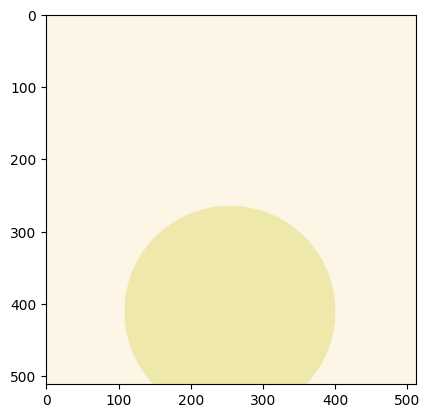

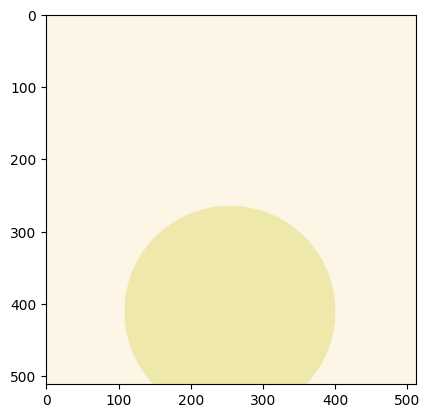

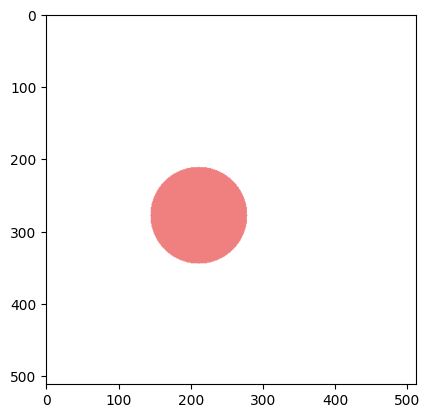

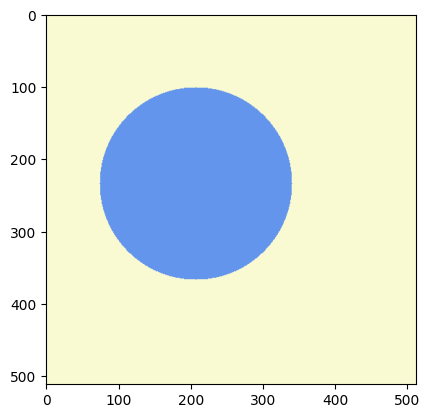

____________________________________________________________
images_guided_tensor:torch.Size([15, 512, 512, 3])
images_predict_tensor:torch.Size([15, 512, 512, 3])
images_target_tensor:torch.Size([15, 512, 512, 3])


In [ ]:
"""
infer_prompt_guided_predict_target.pth: [texts, images_guided, images, images_target]
texts: list of strings
images_guided: list of guided images, each image is a numpy array of shape (512, 512, 3)
images: list of predicted images, each image is a numpy array of shape (512, 512, 3)
images_target: list of groud truth images, each image is a numpy array of shape (512, 512, 3)
"""

data = torch.load('infer_prompt_guided_predict_target.pth')

texts = data[0]
images_guided = data[1]
images_predict = data[2]
images_target = data[3]

images_guided_tensor = torch.tensor(images_guided)
images_predict_tensor = torch.tensor(images_predict)
images_target_tensor = torch.tensor(images_target)

print('_' * 60)
print(f'texts:{len(texts)}')
print(texts[0])
print(texts[1])
print(texts[3])
print(texts[10])
print(f'images_guided:{len(images_guided)}, {images_guided[0].shape}')
plt.imshow(images_guided[0])
plt.show()
plt.imshow(images_guided[1])
plt.show()
plt.imshow(images_guided[3])
plt.show()
plt.imshow(images_guided[10])
plt.show()
print(f'images_predict:{len(images_predict)}, {images_predict[0].shape}')
plt.imshow(images_predict[0])
plt.show()
plt.imshow(images_predict[1])
plt.show()
plt.imshow(images_predict[3])
plt.show()
plt.imshow(images_predict[10])
plt.show()
print(f'images_target:{len(images_target)}, {images_target[0].shape}')
plt.imshow(images_target[0])
plt.show()
plt.imshow(images_target[1])
plt.show()
plt.imshow(images_target[3])
plt.show()
plt.imshow(images_target[10])
plt.show()

print('_' * 60)
print(f'images_guided_tensor:{images_guided_tensor.shape}')
print(f'images_predict_tensor:{images_predict_tensor.shape}')
print(f'images_target_tensor:{images_target_tensor.shape}')

measure score

measure score > embedding-based > clip score

measure score > embedding-based > clip score > prepare dataset

In [ ]:
clip_images = []

for i in range(images_predict_tensor.size(0)):
  clip_images.append(images_predict_tensor[i].permute(2, 0, 1).float())

clip_images = torch.stack(clip_images)

print('_' * 60)
print(f'texts:{len(texts)}')
print(texts[0])
print(texts[3])
print(texts[10])
print(f'clip_images:{clip_images.shape}')
print(f'clip_image:{clip_images[0]}')
print(f'clip_image:{clip_images[3]}')
print(f'clip_image:{clip_images[10]}')

____________________________________________________________
texts:15
pale golden rod circle with old lace background
light coral circle with white background
cornflower blue circle with light golden rod yellow background
clip_images:torch.Size([15, 3, 512, 512])
clip_image:tensor([[[175., 190., 204.,  ...,  25.,  46.,  72.],
         [205., 230., 234.,  ...,   0.,  10.,  51.],
         [225., 253., 255.,  ...,   0.,  19.,  57.],
         ...,
         [  0.,   0.,   0.,  ..., 109., 122., 126.],
         [  0.,   0.,   0.,  ..., 120., 122., 128.],
         [ 11.,   0.,   0.,  ..., 126., 128., 132.]],

        [[184., 205., 227.,  ...,  14.,  31.,  55.],
         [213., 247., 255.,  ...,   0.,   7.,  38.],
         [240., 255., 255.,  ...,   0.,   0.,  37.],
         ...,
         [  0.,   0.,   0.,  ...,  71.,  92., 102.],
         [  0.,   0.,   0.,  ...,  84.,  99., 105.],
         [ 20.,   0.,   0.,  ...,  98., 106., 112.]],

        [[163., 165., 179.,  ...,  26.,  43.,  68.],
    

measure score > embedding-based > clip score > calculate score

In [ ]:
from torchmetrics.multimodal.clip_score import CLIPScore
clip_metric = CLIPScore(model_name_or_path="openai/clip-vit-base-patch16")

clip_scores = []
for i in range(clip_images.size(0)):
  score = clip_metric(clip_images[i].unsqueeze(0), [texts[i]])
  score.detach()
  clip_scores.append(score.item())

for i, score in enumerate(clip_scores):
  print(f"CLIP Score for instance {i}: {clip_scores[i]}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP Score for instance 0: 23.334976196289062
CLIP Score for instance 1: 23.8004207611084
CLIP Score for instance 2: 22.793821334838867
CLIP Score for instance 3: 24.385555267333984
CLIP Score for instance 4: 24.57191276550293
CLIP Score for instance 5: 24.165456771850586
CLIP Score for instance 6: 23.2443904876709
CLIP Score for instance 7: 23.00247573852539
CLIP Score for instance 8: 23.492345809936523
CLIP Score for instance 9: 23.869592666625977
CLIP Score for instance 10: 23.81593894958496
CLIP Score for instance 11: 23.690792083740234
CLIP Score for instance 12: 22.13498878479004
CLIP Score for instance 13: 22.428932189941406
CLIP Score for instance 14: 22.290836334228516


measure score > embedding-based > clip score > summary score



In [ ]:
clip_scores_mean = np.mean(clip_scores)
clip_scores_median = np.median(clip_scores)
clip_scores_std_dev = np.std(clip_scores)

print(f"Mean CLIP Score: {clip_scores_mean}")
print(f"Median CLIP Score: {clip_scores_median}")
print(f"Standard Deviation of CLIP Scores: {clip_scores_std_dev}")

Mean CLIP Score: 23.401495742797852
Median CLIP Score: 23.492345809936523
Standard Deviation of CLIP Scores: 0.7259443004514533


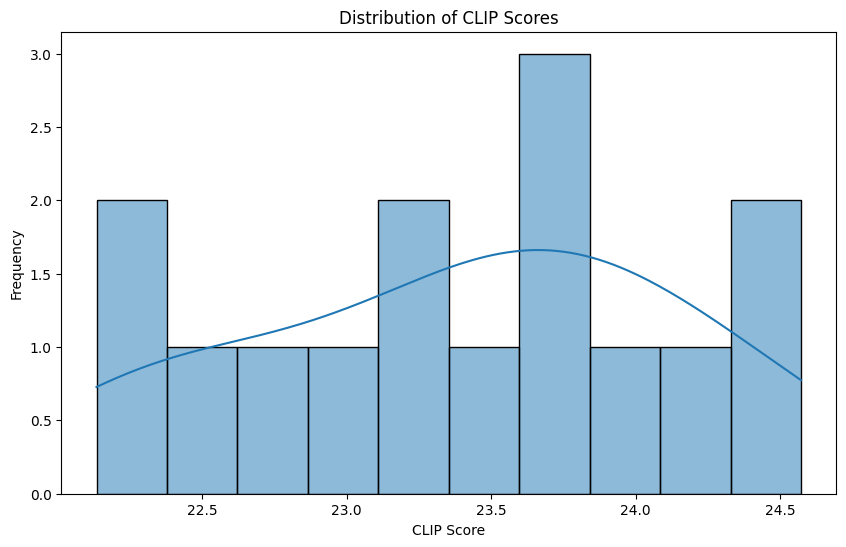

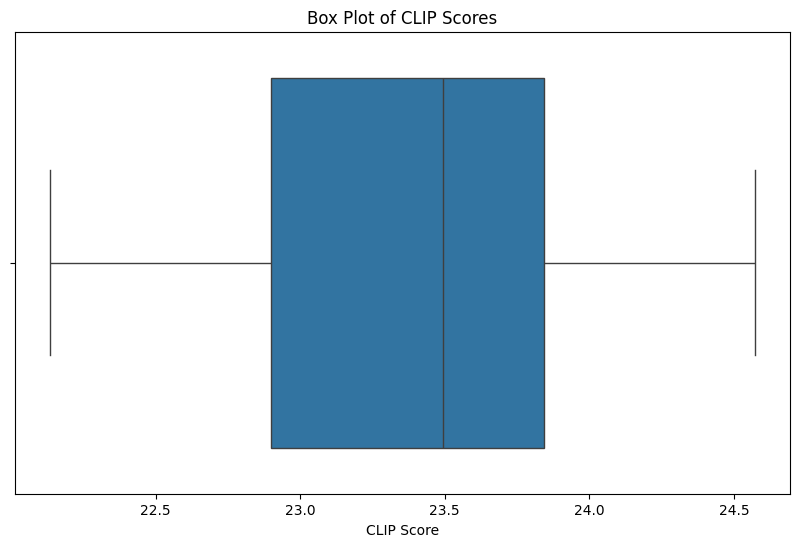

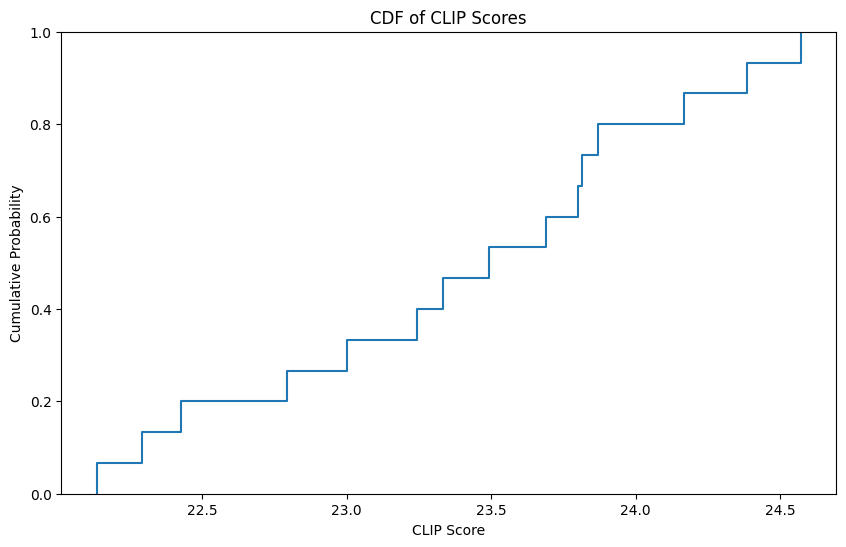

<ipython-input-6-e4eb8f6f2646>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clip_scores, shade=True)


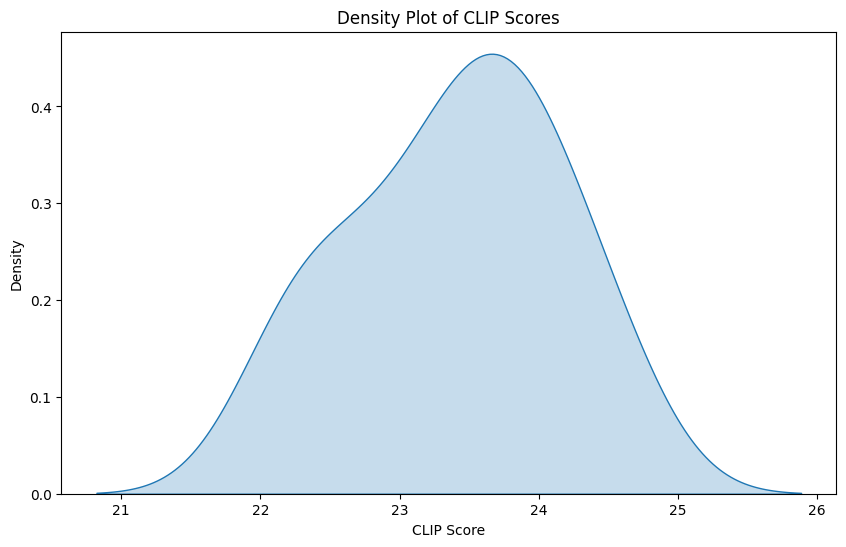

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(clip_scores, bins=10, kde=True)
plt.title('Distribution of CLIP Scores')
plt.xlabel('CLIP Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=clip_scores)
plt.title('Box Plot of CLIP Scores')
plt.xlabel('CLIP Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(clip_scores)
plt.title('CDF of CLIP Scores')
plt.xlabel('CLIP Score')
plt.ylabel('Cumulative Probability')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(clip_scores, shade=True)
plt.title('Density Plot of CLIP Scores')
plt.xlabel('CLIP Score')
plt.ylabel('Density')
plt.show()

measure score > distribution > FID

measure score > distribution > FID > prepare dataset

In [ ]:
fid_images_predict = []
fid_images_target = []

for i in range(images_predict_tensor.size(0)):
  fid_images_predict.append(images_predict_tensor[i].permute(2, 0, 1).float())
  fid_images_target.append(images_target_tensor[i].permute(2, 0, 1).float())

fid_images_predict = torch.stack(fid_images_predict).to(torch.uint8)
fid_images_target = torch.stack(fid_images_target).to(torch.uint8)

print('_' * 60)
print(f'fid_images_predict:{fid_images_predict.shape}')
print(f'fid_images_predict:{fid_images_predict[0]}')
print(f'fid_images_predict:{fid_images_predict[3]}')
print(f'fid_images_predict:{fid_images_predict[10]}')
print(f'fid_images_target:{fid_images_target.shape}')
print(f'fid_images_target:{fid_images_target[0]}')
print(f'fid_images_target:{fid_images_target[3]}')
print(f'fid_images_target:{fid_images_target[10]}')

____________________________________________________________
fid_images_predict:torch.Size([15, 3, 512, 512])
fid_images_predict:tensor([[[175, 190, 204,  ...,  25,  46,  72],
         [205, 230, 234,  ...,   0,  10,  51],
         [225, 253, 255,  ...,   0,  19,  57],
         ...,
         [  0,   0,   0,  ..., 109, 122, 126],
         [  0,   0,   0,  ..., 120, 122, 128],
         [ 11,   0,   0,  ..., 126, 128, 132]],

        [[184, 205, 227,  ...,  14,  31,  55],
         [213, 247, 255,  ...,   0,   7,  38],
         [240, 255, 255,  ...,   0,   0,  37],
         ...,
         [  0,   0,   0,  ...,  71,  92, 102],
         [  0,   0,   0,  ...,  84,  99, 105],
         [ 20,   0,   0,  ...,  98, 106, 112]],

        [[163, 165, 179,  ...,  26,  43,  68],
         [185, 189, 201,  ...,   0,  15,  42],
         [215, 214, 228,  ...,  12,  32,  50],
         ...,
         [  0,   0,   0,  ...,   6,  32,  60],
         [  0,   0,   0,  ...,  26,  49,  71],
         [  8,   0,   0,  

measure score > distribution > FID > calculate score

In [ ]:
from torchmetrics.image.fid import FrechetInceptionDistance
fid_metric = FrechetInceptionDistance(feature=64)

fid_scores = []
fid_metric.update(fid_images_target, real=True)
fid_metric.update(fid_images_predict, real=False)
fid_score = fid_metric.compute()
print(f"FID Score: {fid_score}")
fid_scores.append(fid_score)

for i, score in enumerate(fid_scores):
  print(f"FID Score for instance {i}: {fid_scores[i]}")

Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 129MB/s]


FID Score: 400.7294006347656
FID Score for instance 0: 400.7294006347656


measure score > distribution > FID > summary score

In [ ]:
fid_scores_mean = np.mean(fid_scores)
fid_scores_median = np.median(fid_scores)
fid_scores_std_dev = np.std(fid_scores)

print(f"Mean fid_scores: {fid_scores_mean}")
print(f"Median fid_scores: {fid_scores_median}")
print(f"Standard Deviation of fid_scores: {fid_scores_std_dev}")

Mean fid_scores: 400.7294006347656
Median fid_scores: 400.7294006347656
Standard Deviation of fid_scores: 0.0


measure score > single image > Aesthetic Predictor

measure score > single image > Aesthetic Predictor > prepare dataset

In [ ]:
ap_images_predict = []

for i in range(images_predict_tensor.size(0)):
  ap_images_predict.append(images_predict_tensor[i].permute(2, 0, 1).float())

ap_images_predict = torch.stack(ap_images_predict)

print('_' * 60)
print(f'ap_images_predict:{ap_images_predict.shape}')
print(f'ap_images_predict:{ap_images_predict[0]}')
print(f'ap_images_predict:{ap_images_predict[3]}')
print(f'ap_images_predict:{ap_images_predict[10]}')

____________________________________________________________
ap_images_predict:torch.Size([15, 3, 512, 512])
ap_images_predict:tensor([[[175., 190., 204.,  ...,  25.,  46.,  72.],
         [205., 230., 234.,  ...,   0.,  10.,  51.],
         [225., 253., 255.,  ...,   0.,  19.,  57.],
         ...,
         [  0.,   0.,   0.,  ..., 109., 122., 126.],
         [  0.,   0.,   0.,  ..., 120., 122., 128.],
         [ 11.,   0.,   0.,  ..., 126., 128., 132.]],

        [[184., 205., 227.,  ...,  14.,  31.,  55.],
         [213., 247., 255.,  ...,   0.,   7.,  38.],
         [240., 255., 255.,  ...,   0.,   0.,  37.],
         ...,
         [  0.,   0.,   0.,  ...,  71.,  92., 102.],
         [  0.,   0.,   0.,  ...,  84.,  99., 105.],
         [ 20.,   0.,   0.,  ...,  98., 106., 112.]],

        [[163., 165., 179.,  ...,  26.,  43.,  68.],
         [185., 189., 201.,  ...,   0.,  15.,  42.],
         [215., 214., 228.,  ...,  12.,  32.,  50.],
         ...,
         [  0.,   0.,   0.,  ...

measure score > single image > Aesthetic Predictor > calculate score

In [ ]:
model_id = "shunk031/aesthetics-predictor-v1-vit-large-patch14"
predictor = AestheticsPredictorV1.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)

inputs = processor(images=ap_images_predict, return_tensors="pt")

with torch.no_grad():
    outputs = predictor(**inputs)
ap_scores = outputs.logits

print(f"Aesthetics score: {ap_scores}")

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Aesthetics score: tensor([[2.6474],
        [2.8984],
        [2.7625],
        [2.6474],
        [2.8984],
        [2.7625],
        [2.6474],
        [2.8984],
        [2.7625],
        [2.6474],
        [2.8984],
        [2.7625],
        [2.6474],
        [2.8984],
        [2.7625]])


measure score > single image > Aesthetic Predictor > summary score

In [ ]:
ap_scores = ap_scores.tolist()
ap_scores = np.array(ap_scores).flatten()
ap_scores_mean = np.mean(ap_scores)
ap_scores_median = np.median(ap_scores)
ap_scores_std_dev = np.std(ap_scores)

print(f"Mean Aesthetic Predictor Score: {ap_scores_mean}")
print(f"Median Aesthetic Predictor Score: {ap_scores_median}")
print(f"Standard Deviation of Aesthetic Predictor Scores: {ap_scores_std_dev}")

Mean Aesthetic Predictor Score: 2.769445514678955
Median Aesthetic Predictor Score: 2.7625198364257812
Standard Deviation of Aesthetic Predictor Scores: 0.10259811426769654


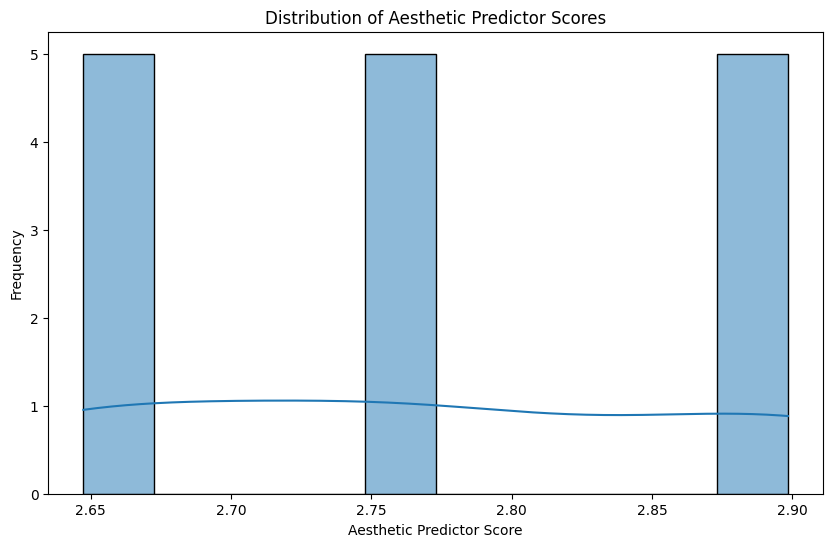

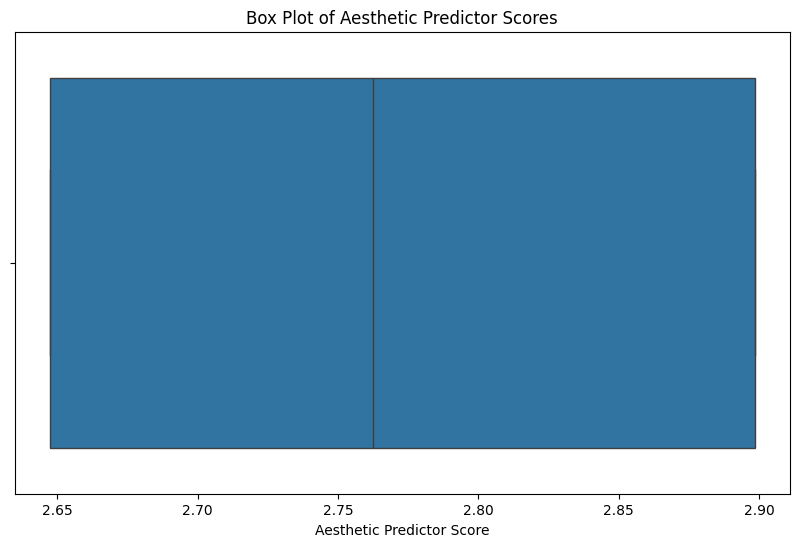

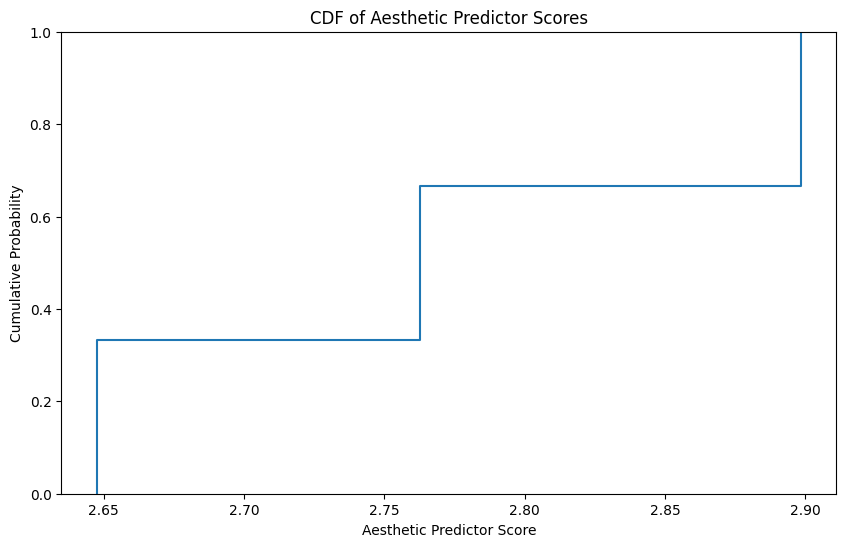

<ipython-input-13-98e68b8361f5>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ap_scores, shade=True)


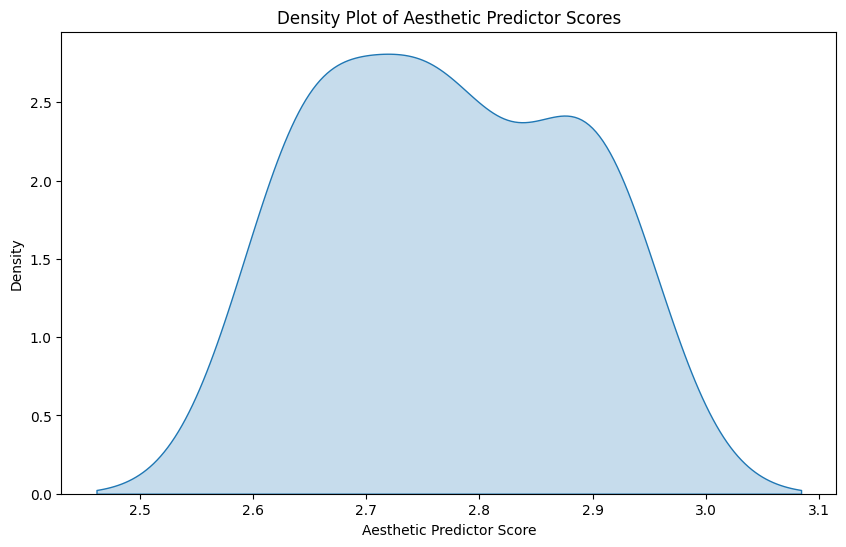

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(ap_scores, bins=10, kde=True)
plt.title('Distribution of Aesthetic Predictor Scores')
plt.xlabel('Aesthetic Predictor Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=ap_scores)
plt.title('Box Plot of Aesthetic Predictor Scores')
plt.xlabel('Aesthetic Predictor Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.ecdfplot(ap_scores)
plt.title('CDF of Aesthetic Predictor Scores')
plt.xlabel('Aesthetic Predictor Score')
plt.ylabel('Cumulative Probability')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(ap_scores, shade=True)
plt.title('Density Plot of Aesthetic Predictor Scores')
plt.xlabel('Aesthetic Predictor Score')
plt.ylabel('Density')
plt.show()